<link rel="stylesheet" href="berkeley.css">

<h1 class="cal cal-h1">Lecture 02 – CS 189, Fall 2025</h1>


In this notebook, we will cover the fundamental concepts and essential techniques for using `pandas` effectively. We will start with creating and inspecting data structures, then move on to accessing, filtering, adding, modifying, sorting, aggregating, and handling missing data. By the end, you will have a solid foundation for performing data analysis tasks using `pandas`. In the second part of this notebook, we will look into visualization using `Matplotlib` and `plotly`.

In [83]:
#@title Download data & Install Dependencies
import os
import requests

# Auto-download data files if they don't exist
data_files = {
    "data/uc_berkeley_events.csv": "https://github.com/BerkeleyML/fa25-student/raw/main/lec/lec02/data/uc_berkeley_events.csv",
    "data/Augmented_Landmarks_DataFrame.csv": "https://github.com/BerkeleyML/fa25-student/raw/main/lec/lec02/data/Augmented_Landmarks_DataFrame.csv",
}

for local_path, url in data_files.items():
    if not os.path.exists(local_path):
        os.makedirs(os.path.dirname(local_path), exist_ok=True)
        print(f"Downloading {local_path}...")
        response = requests.get(url)
        with open(local_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {local_path}")

%pip install -q plotly kaleido==0.2.1


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## `pandas`

`pandas` is a powerful and flexible open-source data analysis and manipulation tool, built on top of the Python programming language. It provides data structures like `DataFrames` and `Series`, and a rich set of functions for working with structured data.

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Pandas Data Structures
`Series`, `DataFrames`, and `Indices` are fundamental `pandas` data structures for storing tabular data and processing the data using vectorized operations.

#### `DataFrame`
Imagine a spreadsheet or a table with rows and columns. That's essentially what a `pandas` `DataFrame` is! It's a 2-dimensional data structure that can store data of different types in each column. Think of it as a collection of `Series` (which are like single columns in a spreadsheet) that share the same index (the row labels).

`DataFrame`s are incredibly useful because they allow us to organize and work with structured data in a clear and efficient way. We can easily access, modify, and analyze data within a `DataFrame`, just like you would in a spreadsheet, but with the power of Python!

We can create a `DataFrame` in different ways:
##### 1. From a CSV File
Use `pd.read_csv()` to load data from a CSV file into a `DataFrame`. You can specify options like `index_col`, `header`, and `na_values`.
##### 2. From Scratch
Manually define data and structure using `pd.DataFrame()` with lists, dictionaries, or other data structures.

In [85]:
# Create a DataFrame with event data from a CSV file
event_data = pd.read_csv("data/uc_berkeley_events.csv", index_col="Year")
event_data

,Event,Location
Year,,
1868,Founding of UC Berkeley,"Berkeley, CA"
1914,Completion of Campanile,"Berkeley, CA"
1923,Opening of Memorial Stadium,"Berkeley, CA"
1964,Free Speech Movement,"Berkeley, CA"
2000,Opening of Hearst Memorial Mining Building,"Berkeley, CA"


In [86]:
# Create a DataFrame with information about landmarks at UC Berkeley
data = {
    'Landmark': ['Sather Gate', 'Campanile', 'Doe Library', 'Memorial Glade', 'Sproul Plaza'],
    'Type': ['Gate', 'Tower', 'Library', 'Open Space', 'Plaza'],
    'Height': [30, 307, 80, 0, 0],
    'Year Built': [1910, 1914, 1911, None, 1962]
}
df = pd.DataFrame(data)

df

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


#### `Series`
A `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating-point numbers, etc.). It can be thought of as a single column of data, similar to a column in a spreadsheet or a database table. Each element in a `Series` is associated with an **index**, which acts as a label for that element.

Below, we will create a `Series` object and explore its two main components:
1. **Values**: The actual data stored in the `Series`.
2. **Index**: The labels associated with each data point, which allow for easy access and manipulation.

In [87]:
welcome_series = pd.Series(["welcome", "to", "CS 189"])

In [88]:
welcome_series.index

RangeIndex(start=0, stop=3, step=1)

In [89]:
welcome_series.values

array(['welcome', 'to', 'CS 189'], dtype=object)

### Exploring `DataFrame`

Understanding the structure and content of your `DataFrame` is an essential first step in data analysis. Here are some key methods to get a quick overview of your `DataFrame`:

**View the first and last rows**:  
- Use `.head()` to display the first few rows of the `DataFrame`.  
- Use `.tail()` to display the last few rows.  

**Inspect the structure**:  
- Use `.info()` to get a summary of the `DataFrame`, including the number of rows, columns, data types, and memory usage.  

**Get basic statistics**:  
- Use `.describe()` to generate descriptive statistics for numeric columns, such as mean, standard deviation, and percentiles.  

**Check dimensions and size**:  
- Use `.shape` to get the number of rows and columns in the `DataFrame`.  
- Use `.size` to get the total number of elements in the `DataFrame`.  

**Random sampling**:  
- Use `.sample()` to return a random sample of rows from the `DataFrame`.  

**Analyze unique values and counts**:  
- Use `.value_counts()` to count unique values in a column.  
- Use `.unique()` to get an array of unique values in a column.  

In [90]:
# Display the first 5 rows
display(df.head())

# Display the last 3 rows
display(df.tail(3))

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


,Landmark,Type,Height,Year Built
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


In [91]:
# Get information about the DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Landmark    5 non-null      object 
 1   Type        5 non-null      object 
 2   Height      5 non-null      int64  
 3   Year Built  4 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


None

In [92]:
# Get descriptive statistics
display(df.describe())

,Height,Year Built
count,5.000000,4.000000
mean,83.400000,1924.250000
std,129.200619,25.223997
min,0.000000,1910.000000
25%,0.000000,1910.750000
50%,30.000000,1912.500000
75%,80.000000,1926.000000
max,307.000000,1962.000000


In [93]:
# Get the shape of the DataFrame
print("Shape of df:", df.shape)

# Get the size of the DataFrame
print("Size of df:", df.size)

Shape of df: (5, 4)
Size of df: 20


In [94]:
# Randomly sample 2 rows from the DataFrame
sampled_data = df.sample(n=2)
display(sampled_data)

# Randomly sample 40% of the rows from the DataFrame
sampled_fraction = df.sample(frac=0.4)
display(sampled_fraction)

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0
0,Sather Gate,Gate,30,1910.0


,Landmark,Type,Height,Year Built
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN


In [95]:
# Get the count of unique values in the 'Type' column of df
type_counts = df['Type'].value_counts()
display(type_counts)

Type
Gate          1
Tower         1
Library       1
Open Space    1
Plaza         1
Name: count, dtype: int64

In [96]:
# Get unique values from the 'Type' column in the df DataFrame
unique_types = df['Type'].unique()
print(unique_types)

['Gate' 'Tower' 'Library' 'Open Space' 'Plaza']


### Selecting and Retrieving Data from a `DataFrame`

When working with `DataFrame`s in `pandas`, there are several ways to select and retrieve data. Each method has its own use case and advantages. Below, we explain the three primary methods: `iloc[]`, `loc[]`, and context-dependent selection.

#### **1. `iloc[]` - Integer-Location Based Indexing**
- Use `iloc[]` when you want to select data based on the integer positions of rows and columns.
- Think of it as using row and column numbers in a spreadsheet, starting from 0.
- Examples:
    - Select a specific cell: `df.iloc[0, 1]` (first row, second column).
    - Select a range of rows and columns: `df.iloc[1:3, 0:2]`.

#### **2. `loc[]` - Label-Based Indexing**
- Use `loc[]` when you want to select data based on row and column labels.
- If you haven't set a custom index, the default integer index will be used, making it similar to `iloc[]`.
- If you have a custom index (e.g., names or dates), `loc[]` will use those labels.
- Examples:
    - Select a specific cell: `df.loc[0, 'Age']` (row with index `0`, column labeled `'Age'`).
    - Select a range of rows and columns: `df.loc[1:3, 'Name':'City']`.

#### **3. Context-Dependent Selection**
- This method allows you to select data based on the context of your `DataFrame`.
- You can directly use column names to select entire columns or slices of rows.
- Examples:
    - Select a single column: `df['Name']`.
    - Select multiple columns: `df[['Name', 'Age']]`.
    - Select a range of rows: `df[1:3]`.

In [97]:
# Accessing an entry by integer location using iloc
display(df.iloc[0, 1])  # Access the value in the first row and second column

'Gate'

In [98]:
# Accessing an entire column using iloc
display(df.iloc[:, 1])  # Access all rows in the second column


0          Gate
1         Tower
2       Library
3    Open Space
4         Plaza
Name: Type, dtype: object

In [99]:
# Accessing an entire row using iloc
display(df.iloc[0])  # Access all columns in the first row

Landmark      Sather Gate
Type                 Gate
Height                 30
Year Built         1910.0
Name: 0, dtype: object

In [100]:
# Accessing a slice of rows using iloc
display(df.iloc[1:3])  # Access rows 1 to 2 (exclusive of 3)


,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0


In [101]:
# Accessing a slice of columns using iloc
display(df.iloc[:, 1:3])  # Access all rows for columns 1 to 2 (exclusive of 3)

,Type,Height
0,Gate,30
1,Tower,307
2,Library,80
3,Open Space,0
4,Plaza,0


In [102]:
# Accessing a specific range of rows and columns using iloc
display(df.iloc[1:3, 1:3])  # Access rows 1 to 2 and columns 1 to 2 (exclusive of 3)

,Type,Height
1,Tower,307
2,Library,80


In [103]:
# Accessing an entry by label using loc
display(df.loc[0, 'Landmark'])  # Access the value in the first row and 'Landmark' column

'Sather Gate'

In [104]:
# Accessing an entire column using loc
display(df.loc[:, 'Landmark'])  # Access all rows in the 'Landmark' column

0       Sather Gate
1         Campanile
2       Doe Library
3    Memorial Glade
4      Sproul Plaza
Name: Landmark, dtype: object

In [105]:
# Accessing an entire row using loc
display(df.loc[0])  # Access all columns in the first row

Landmark      Sather Gate
Type                 Gate
Height                 30
Year Built         1910.0
Name: 0, dtype: object

In [106]:
# Accessing a slice of rows using loc
display(df.loc[1:3])  # Access rows 1 to 3 (inclusive)

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN


In [107]:
# Accessing a slice of columns using loc
display(df.loc[:, 'Landmark':'Height'])  # Access all rows for columns 'Landmark' to 'Height'

,Landmark,Type,Height
0,Sather Gate,Gate,30
1,Campanile,Tower,307
2,Doe Library,Library,80
3,Memorial Glade,Open Space,0
4,Sproul Plaza,Plaza,0


In [108]:
# Accessing a specific range of rows and columns using loc
display(df.loc[1:3, 'Landmark':'Height'])  # Access rows 1 to 3 and columns 'Landmark' to 'Height'

,Landmark,Type,Height
1,Campanile,Tower,307
2,Doe Library,Library,80
3,Memorial Glade,Open Space,0


In [109]:
# Accessing a single column using context-dependent selection
display(df['Year Built'])  # Access the 'Year Built' column

0    1910.0
1    1914.0
2    1911.0
3       NaN
4    1962.0
Name: Year Built, dtype: float64

In [110]:
# Accessing multiple columns using context-dependent selection
display(df[['Landmark', 'Year Built']])  # Access the 'Landmark' and 'Year Built' columns

,Landmark,Year Built
0,Sather Gate,1910.0
1,Campanile,1914.0
2,Doe Library,1911.0
3,Memorial Glade,NaN
4,Sproul Plaza,1962.0


In [111]:
# Accessing a slice of rows using context-dependent selection
display(df[1:3])  # Access rows 1 to 2 (exclusive of 3)

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0


### Filtering Data in a `DataFrame`

Filtering is a powerful technique in `pandas` that allows you to extract specific rows from your `DataFrame` based on conditions. This is particularly useful when you want to focus on a subset of your data that meets certain criteria.

For example, you can filter rows where a column's value is greater than a threshold, matches a specific value, or satisfies multiple conditions. Filtering can also be combined with logical operators like `&` (AND), `|` (OR), and `~` (NOT) to create complex queries.

In [112]:
# Filter by a single condition
display(df[df['Height'] > 50])

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0


In [113]:
# Filter by multiple conditions
display(df[(df['Height'] > 50) & (df['Type'] == 'Library')])

,Landmark,Type,Height,Year Built
2,Doe Library,Library,80,1911.0


In [114]:
# Filter using isin()
display(df[df['Type'].isin(['Gate', 'Plaza'])])

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
4,Sproul Plaza,Plaza,0,1962.0


### `DataFrame` Modification

We can modify a `DataFrame` by:
1. Add new columns.
2. Perform calculations to create new data.
3. Modify existing values in your `DataFrame`.
4. Drop an existing column.

In [115]:
# Add a new column
df['Experience'] = [2, 5, 1, 8, 4]
display(df)

,Landmark,Type,Height,Year Built,Experience
0,Sather Gate,Gate,30,1910.0,2
1,Campanile,Tower,307,1914.0,5
2,Doe Library,Library,80,1911.0,1
3,Memorial Glade,Open Space,0,NaN,8
4,Sproul Plaza,Plaza,0,1962.0,4


In [116]:
# Add a calculated column
df['Height_Increase'] = df['Height'] * 0.10
display(df)

,Landmark,Type,Height,Year Built,Experience,Height_Increase
0,Sather Gate,Gate,30,1910.0,2,3.0
1,Campanile,Tower,307,1914.0,5,30.7
2,Doe Library,Library,80,1911.0,1,8.0
3,Memorial Glade,Open Space,0,NaN,8,0.0
4,Sproul Plaza,Plaza,0,1962.0,4,0.0


In [117]:
# Modify existing values using .loc[]
df.loc[df['Landmark'] == 'Sather Gate', 'Height_Increase'] = 5
display(df)

,Landmark,Type,Height,Year Built,Experience,Height_Increase
0,Sather Gate,Gate,30,1910.0,2,5.0
1,Campanile,Tower,307,1914.0,5,30.7
2,Doe Library,Library,80,1911.0,1,8.0
3,Memorial Glade,Open Space,0,NaN,8,0.0
4,Sproul Plaza,Plaza,0,1962.0,4,0.0


In [118]:
# Drop the 'Experience' column from the DataFrame
# Note: This operation does not modify the original DataFrame since inplace=False by default
df.drop(columns=['Experience'])
display(df)

,Landmark,Type,Height,Year Built,Experience,Height_Increase
0,Sather Gate,Gate,30,1910.0,2,5.0
1,Campanile,Tower,307,1914.0,5,30.7
2,Doe Library,Library,80,1911.0,1,8.0
3,Memorial Glade,Open Space,0,NaN,8,0.0
4,Sproul Plaza,Plaza,0,1962.0,4,0.0


In [119]:
# Drop the 'Experience' column using the inplace parameter
df.drop(columns=['Experience'], inplace=True)

display(df)

,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,5.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,0.0
4,Sproul Plaza,Plaza,0,1962.0,0.0


In [120]:
# Reassign the DataFrame to drop the 'Height_Increase' column
df_dropped = df.drop(columns=['Height_Increase'])

display(df_dropped)

# Display the original DataFrame to show it remains unchanged after reassignment
display(df)

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


,Landmark,Type,Height,Year Built,Height_Increase
0,Sather Gate,Gate,30,1910.0,5.0
1,Campanile,Tower,307,1914.0,30.7
2,Doe Library,Library,80,1911.0,8.0
3,Memorial Glade,Open Space,0,NaN,0.0
4,Sproul Plaza,Plaza,0,1962.0,0.0


In [121]:
df = df_dropped

df

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


#### Sorting Your DataFrame
Sorting organizes your data for better analysis. Use `sort_values()` to sort by one or more columns in ascending or descending order.

- **Single column**: `df.sort_values(by='Column', ascending=True)`
- **Multiple columns**: `df.sort_values(by=['Col1', 'Col2'], ascending=[True, False])`


In [122]:
# Sort by a single column
display(df.sort_values(by='Height'))

,Landmark,Type,Height,Year Built
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0
0,Sather Gate,Gate,30,1910.0
2,Doe Library,Library,80,1911.0
1,Campanile,Tower,307,1914.0


In [123]:
# Sort by multiple columns
display(df.sort_values(by=['Height', 'Type'], ascending=[True, False]))

,Landmark,Type,Height,Year Built
4,Sproul Plaza,Plaza,0,1962.0
3,Memorial Glade,Open Space,0,NaN
0,Sather Gate,Gate,30,1910.0
2,Doe Library,Library,80,1911.0
1,Campanile,Tower,307,1914.0


#### Handling Missing Values in a DataFrame

Missing values are a common issue in real-world datasets. Properly identifying and handling missing values is crucial for ensuring the accuracy and reliability of your analysis.

We will explore techniques to:
1. Detect missing values in a `DataFrame`.
2. Quantify the extent of missing data.
3. Handle missing values by either removing or imputing them.

In [124]:
# Introduce missing values
df_missing = df.copy()
df_missing.loc[0, 'Year Built'] = np.nan
df_missing.loc[2, 'Height'] = np.nan
df_missing.loc[4, 'Type'] = None
display(df_missing)

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30.0,NaN
1,Campanile,Tower,307.0,1914.0
2,Doe Library,Library,NaN,1911.0
3,Memorial Glade,Open Space,0.0,NaN
4,Sproul Plaza,None,0.0,1962.0


In [125]:
# Check for missing values
display(df_missing.isnull())

# Count missing values per column
display(df_missing.isnull().sum())

,Landmark,Type,Height,Year Built
0,False,False,False,True
1,False,False,False,False
2,False,False,True,False
3,False,False,False,True
4,False,True,False,False


Landmark      0
Type          1
Height        1
Year Built    2
dtype: int64

In [126]:
# Drop rows with missing values
display(df_missing.dropna())

,Landmark,Type,Height,Year Built
1,Campanile,Tower,307.0,1914.0


In [127]:
# Fill missing values
display(df_missing.fillna(0))

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30.0,0.0
1,Campanile,Tower,307.0,1914.0
2,Doe Library,Library,0.0,1911.0
3,Memorial Glade,Open Space,0.0,0.0
4,Sproul Plaza,0,0.0,1962.0


In [128]:
# Fills missing values in `df_missing` with defaults: mean for 'Year Built', median for 'Height', and 'Unknown' for 'Type', then displays the result.
display(df_missing.fillna({'Year Built': df_missing['Year Built'].mean(), 'Height': df_missing['Height'].median(), 'Type': 'Unknown'}))


,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30.0,1929.0
1,Campanile,Tower,307.0,1914.0
2,Doe Library,Library,15.0,1911.0
3,Memorial Glade,Open Space,0.0,1929.0
4,Sproul Plaza,Unknown,0.0,1962.0


### Aggregation in `DataFrame`

We can perform aggregations on our data, such as calculating means, sums, and other summary statistics. Additionally, we can group data for more advanced analysis.

1. **Aggregation**: Operations like `mean()`, `sum()`, `count()`, etc., can be applied to columns of data.
2. **Grouping**: We can split data into groups based on some criteria, apply a function to each group, and combine the results.

    - **Syntax**: Use the `groupby()` method to group data by one or more columns, and then apply aggregation functions like `mean()`, `sum()`, `count()`, etc.
    - **Example**:
      - Group by a single column and calculate the mean: `df.groupby('Type')['Height'].mean()`
      - Group by multiple columns and calculate the sum: `df.groupby(['Type', 'Year Built'])['Height'].sum()`
      - Count the number of entries in each group: `df.groupby('Type').size()`

    Grouping is particularly useful for summarizing data and identifying patterns within subsets of your dataset.


#### Aggregation Functions

In `pandas`, you can apply a wide range of aggregation functions directly to DataFrame columns (just like `sum()`). Here are the most common ones:

##### Basic Aggregations

- sum() – sum of values

- mean() – average

- median() – median

- min() – minimum

- max() – maximum

- count() – number of non-null entries

- nunique() – number of unique values

- prod() – product of all values

##### Statistical Aggregations

- std() – standard deviation

- var() – variance

- sem() – standard error of the mean

- skew() – skewness


##### Logical and Index-based Aggregations

- any() – returns True if any value is True

- all() – returns True if all values are True

- first() – first non-null value

- last() – last non-null value

- idxmin() – index of min value

- idxmax() – index of max value

In [129]:
# Calculate mean of the 'Height' column
height_mean = df['Height'].mean()
print(height_mean)

# Calculate sum of the 'Height' column
height_sum = df['Height'].sum()
print(height_sum)

83.4
417


In [130]:
# Calculate the standard deviation of the 'Height' column
height_std = df['Height'].std()
print(height_std)

129.2006191935627


In [131]:
# Find the index of the maximum value in the 'Height' column
max_height_index = df['Height'].idxmax()
print("Index of maximum height:", max_height_index)

Index of maximum height: 1


#### `Groupby()`

Now lets' investigate grouping rows in `DataFrame` using `.groupby()`. For this purpose, we will use an augmented version of our dataset that includes landmarks from MIT and Stanford too.

In [132]:
augmented_df = pd.read_csv("data/Augmented_Landmarks_DataFrame.csv")
augmented_df

,Landmark,Type,Height,Year Built,Campus
0,Sather Gate,Gate,30,1910.0,UC Berkeley
1,Campanile,Tower,307,1914.0,UC Berkeley
2,Doe Library,Library,80,1911.0,UC Berkeley
3,Memorial Glade,Open Space,0,NaN,UC Berkeley
4,Sproul Plaza,Plaza,0,1962.0,UC Berkeley
5,North Gate,Gate,25,1909.0,UC Berkeley
6,Moffitt Library,Library,60,1970.0,UC Berkeley
7,Faculty Glade,Open Space,0,NaN,UC Berkeley
8,Lower Sproul Plaza,Plaza,0,2015.0,UC Berkeley
9,77 Mass Ave Entrance,Gate,15,1939.0,MIT


In [133]:
# Group the DataFrame by the 'Type' column
grouped = augmented_df.groupby('Type')

# Iterate through each group and display its content
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    display(group_data)

Group: Gate


,Landmark,Type,Height,Year Built,Campus
0,Sather Gate,Gate,30,1910.0,UC Berkeley
5,North Gate,Gate,25,1909.0,UC Berkeley
9,77 Mass Ave Entrance,Gate,15,1939.0,MIT
14,Palm Drive Entrance,Gate,20,1890.0,Stanford


Group: Library


,Landmark,Type,Height,Year Built,Campus
2,Doe Library,Library,80,1911.0,UC Berkeley
6,Moffitt Library,Library,60,1970.0,UC Berkeley
11,Barker Library,Library,0,1916.0,MIT
16,Green Library,Library,0,1919.0,Stanford


Group: Open Space


,Landmark,Type,Height,Year Built,Campus
3,Memorial Glade,Open Space,0,NaN,UC Berkeley
7,Faculty Glade,Open Space,0,NaN,UC Berkeley
12,Killian Court,Open Space,0,1920.0,MIT
17,Main Quad,Open Space,0,1891.0,Stanford


Group: Plaza


,Landmark,Type,Height,Year Built,Campus
4,Sproul Plaza,Plaza,0,1962.0,UC Berkeley
8,Lower Sproul Plaza,Plaza,0,2015.0,UC Berkeley
13,Stata Center Courtyard,Plaza,0,2004.0,MIT
18,White Plaza,Plaza,0,1964.0,Stanford


Group: Tower


,Landmark,Type,Height,Year Built,Campus
1,Campanile,Tower,307,1914.0,UC Berkeley
10,Green Building,Tower,295,1964.0,MIT
15,Hoover Tower,Tower,285,1941.0,Stanford


##### Grouping by One Column

In [134]:
augmented_df.groupby('Type')[['Height']].mean()

,Height
Type,
Gate,22.500000
Library,35.000000
Open Space,0.000000
Plaza,0.000000
Tower,295.666667


In [135]:
augmented_df.groupby('Type')[['Height', 'Year Built']].mean()


,Height,Year Built
Type,,
Gate,22.500000,1912.000000
Library,35.000000,1929.000000
Open Space,0.000000,1905.500000
Plaza,0.000000,1986.250000
Tower,295.666667,1939.666667


##### Grouping by Multiple Columns

In [136]:
augmented_df.groupby(['Type', 'Campus'])[['Height']].agg('max')

Height
Type       Campus             
Gate       MIT              15
           Stanford         20
           UC Berkeley      30
Library    MIT               0
           Stanford          0
           UC Berkeley      80
Open Space MIT               0
           Stanford          0
           UC Berkeley       0
Plaza      MIT               0
           Stanford          0
           UC Berkeley       0
Tower      MIT             295
           Stanford        285
           UC Berkeley     307

#### Pivot Tables in `pandas`
A pivot table is a powerful data summarization tool that allows you to reorganize and aggregate data in a `DataFrame`. It is particularly useful for analyzing and summarizing large datasets by grouping data and applying aggregation functions.

**Syntax:**
`pd.pivot_table(data, values='column_to_aggregate', index='row_index', columns='column_headers', aggfunc='aggregation_function')`

1. **Index**: Rows of the pivot table, typically representing unique values from one or more columns.
2. **Columns**: Columns of the pivot table, typically representing unique values from another column.
3. **Values**: The data to be aggregated, typically numeric columns.
4. **Aggregation Function**: The function applied to summarize the data, such as `mean`, `sum`, `count`, etc.

In [137]:
# Create a pivot table to summarize the average Height for each Type and Campus
pivot_table = pd.pivot_table(
    augmented_df,
    index='Type',
    columns='Campus',
    values='Height',
    aggfunc='max'
)

# Display the pivot table
display(pivot_table)

Campus,MIT,Stanford,UC Berkeley
Type,,,
Gate,15,20,30
Library,0,0,80
Open Space,0,0,0
Plaza,0,0,0
Tower,295,285,307


### Joining `DataFrames` in `pandas`

Joining `DataFrames` is a common operation when working with multiple datasets. It allows you to combine data from different sources based on a common key or index. `pandas` provides several methods for joining `DataFrames`, including `merge()`, `join()`, and concatenation.

#### Types of Joins:
1. **Inner Join**: Returns only the rows with matching keys in both `DataFrames`.
2. **Outer Join**: Returns all rows from both `DataFrames`, filling missing values with `NaN` where there is no match.
3. **Left Join**: Returns all rows from the left DataFrame and matching rows from the right DataFrame.
4. **Right Join**: Returns all rows from the right DataFrame and matching rows from the left DataFrame.

Below, we demonstrate how to join two `DataFrames`: `landmarks` and `event_data`.

In [138]:
landmarks = df.copy()
landmarks

,Landmark,Type,Height,Year Built
0,Sather Gate,Gate,30,1910.0
1,Campanile,Tower,307,1914.0
2,Doe Library,Library,80,1911.0
3,Memorial Glade,Open Space,0,NaN
4,Sproul Plaza,Plaza,0,1962.0


##### Inner Join

In [139]:
# Reset the index of event_data without keeping the old index as a column
event_data.reset_index(inplace=True)
event_data

,Year,Event,Location
0,1868,Founding of UC Berkeley,"Berkeley, CA"
1,1914,Completion of Campanile,"Berkeley, CA"
2,1923,Opening of Memorial Stadium,"Berkeley, CA"
3,1964,Free Speech Movement,"Berkeley, CA"
4,2000,Opening of Hearst Memorial Mining Building,"Berkeley, CA"


In [140]:
# Perform an inner join using the join method
result_join_inner = landmarks.join(event_data.set_index('Year'), on='Year Built', how='inner')

# Display the result
result_join_inner

,Landmark,Type,Height,Year Built,Event,Location
1,Campanile,Tower,307,1914.0,Completion of Campanile,"Berkeley, CA"


In [141]:
# Perform an inner join using the merge function
result_merge_inner = landmarks.merge(event_data, how='inner', left_on='Year Built', right_on='Year')

# Display the result
display(result_merge_inner)


,Landmark,Type,Height,Year Built,Year,Event,Location
0,Campanile,Tower,307,1914.0,1914,Completion of Campanile,"Berkeley, CA"


##### Outer Join

In [142]:
# Perform an outer join
result_join_outer = landmarks.join(event_data.set_index('Year'), on='Year Built', how='outer')

# Display the result
display(result_join_outer)

,Landmark,Type,Height,Year Built,Event,Location
NaN,NaN,NaN,NaN,1868.0,Founding of UC Berkeley,"Berkeley, CA"
0.0,Sather Gate,Gate,30.0,1910.0,NaN,NaN
2.0,Doe Library,Library,80.0,1911.0,NaN,NaN
1.0,Campanile,Tower,307.0,1914.0,Completion of Campanile,"Berkeley, CA"
NaN,NaN,NaN,NaN,1923.0,Opening of Memorial Stadium,"Berkeley, CA"
4.0,Sproul Plaza,Plaza,0.0,1962.0,NaN,NaN
NaN,NaN,NaN,NaN,1964.0,Free Speech Movement,"Berkeley, CA"
NaN,NaN,NaN,NaN,2000.0,Opening of Hearst Memorial Mining Building,"Berkeley, CA"
3.0,Memorial Glade,Open Space,0.0,NaN,NaN,NaN


In [143]:
# Perform an outer join using the merge function
result_merge_outer = landmarks.merge(event_data, left_on='Year Built', right_on='Year', how='outer')

# Display the result
display(result_merge_outer)

,Landmark,Type,Height,Year Built,Year,Event,Location
0,NaN,NaN,NaN,NaN,1868.0,Founding of UC Berkeley,"Berkeley, CA"
1,Sather Gate,Gate,30.0,1910.0,NaN,NaN,NaN
2,Doe Library,Library,80.0,1911.0,NaN,NaN,NaN
3,Campanile,Tower,307.0,1914.0,1914.0,Completion of Campanile,"Berkeley, CA"
4,NaN,NaN,NaN,NaN,1923.0,Opening of Memorial Stadium,"Berkeley, CA"
5,Sproul Plaza,Plaza,0.0,1962.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1964.0,Free Speech Movement,"Berkeley, CA"
7,NaN,NaN,NaN,NaN,2000.0,Opening of Hearst Memorial Mining Building,"Berkeley, CA"
8,Memorial Glade,Open Space,0.0,NaN,NaN,NaN,NaN


-------

## Visualization

Building visualization is an important part of machine learning. In this notebook, we will explore how to create interactive visualizations using Plotly, a powerful library for creating dynamic and engaging plots.

Critically, we will learn how to use Plotly to visualize data in a way that helps us debug machine learning algorithms and communicate results effectively.

There are many different visualization libraries available in Python, but Plotly stands out for its interactivity and ease of use. It allows us to create plots that can be easily shared and embedded in web applications.  However, you will likely also encounter Matplotlib and its more friendly Seaborn wrapper. Matplotlib is a more traditional plotting library that is widely used in the Python community. It is a good choice for creating static plots, but it does not have the same level of interactivity as Plotly. Seaborn is a higher-level interface to Matplotlib that makes it easier to create complex visualizations with less code.

We have chosen to prioritize Plotly in this course because we believe it is important to be able to interact with your data as you explore it.  

### Toy Data

Here we will use the [auto-mpg dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg) from the UCI Machine Learning Repository, which contains information about various cars, including their miles per gallon (MPG), number of cylinders, horsepower, and more. This dataset is commonly used for regression tasks in machine learning.

In [144]:
mpg = pd.read_csv("hf://datasets/scikit-learn/auto-mpg/auto-mpg.csv")
mpg['origin'] = mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


### Matplotlib and Seaborn

#### Matplotlib
Matplotlib is a versatile Python library for creating static, animated, and interactive visualizations. It offers a low-level interface for highly customizable plots, suitable for publication-quality visualizations.

##### Types of Plots:
- Line Plots
- Scatter Plots
- Bar Charts
- Histograms
- Box Plots
- Heatmaps

#### Seaborn
Seaborn is a high-level interface built on top of Matplotlib, designed for statistical data visualization. It provides an intuitive interface and aesthetically pleasing default styles, working seamlessly with Pandas DataFrames.

##### Types of Plots:
- Relational Plots (scatter, line)
- Categorical Plots (bar, box, violin, swarm)
- Distribution Plots (histograms, KDE, rug)
- Regression Plots
- Heatmaps

Matplotlib offers more control, while Seaborn simplifies the creation of visually appealing plots.

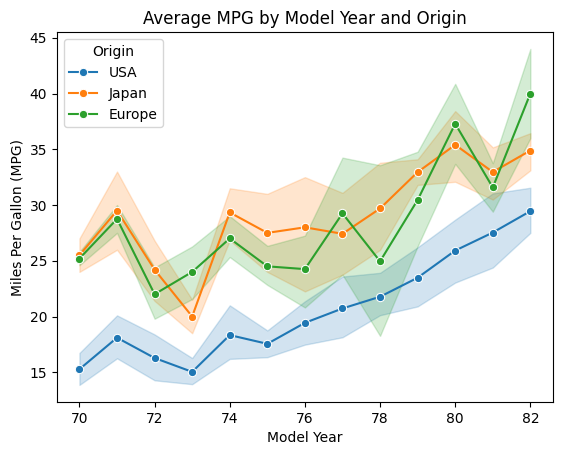

In [145]:
# Line Plot
sns.lineplot(data=mpg, x='model year', y='mpg', hue='origin', marker='o')
plt.title('Average MPG by Model Year and Origin')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Origin')
plt.show()

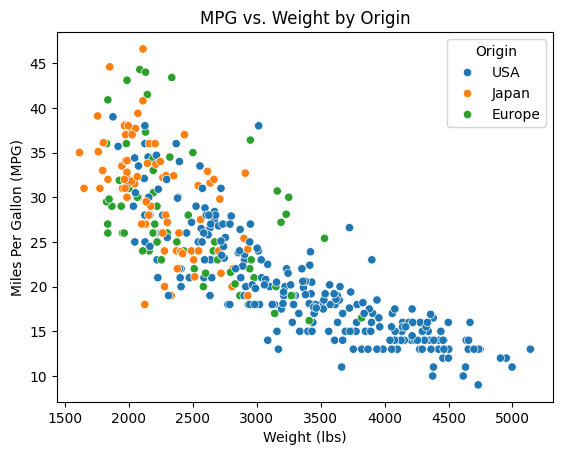

In [146]:
# Scatter Plot
sns.scatterplot(data=mpg, x='weight', y='mpg', hue='origin')
plt.title('MPG vs. Weight by Origin')
plt.xlabel('Weight (lbs)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Origin')
plt.show()

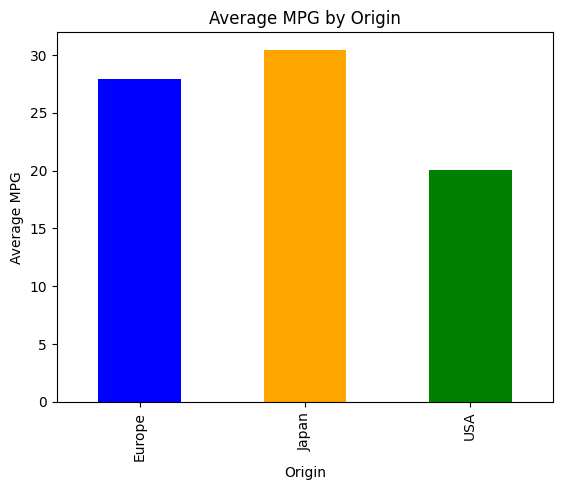

In [147]:
# Bar Chart
mpg.groupby('origin')['mpg'].mean().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Average MPG by Origin')
plt.ylabel('Average MPG')
plt.xlabel('Origin')
plt.show()

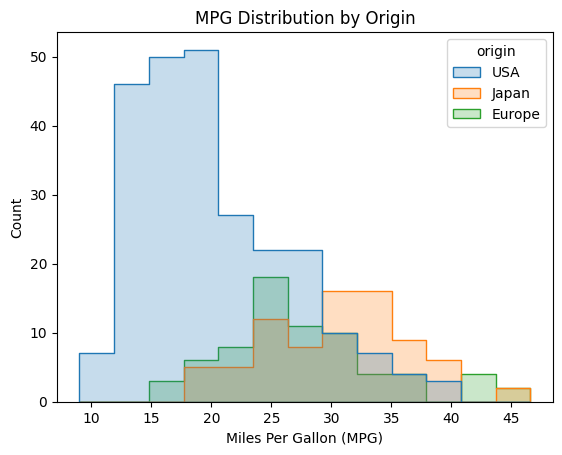

In [148]:
# Histogram
sns.histplot(data=mpg, x='mpg', hue='origin', element='step', stat='count', common_norm=False)
plt.title('MPG Distribution by Origin')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Count')
plt.show()

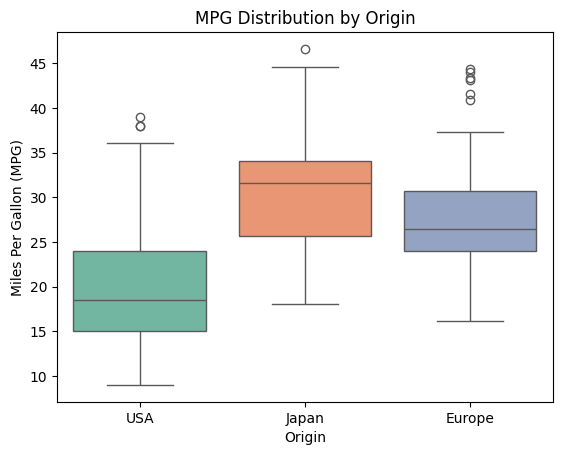

In [149]:
# Box Plot
sns.boxplot(data=mpg, x='origin', y='mpg', hue='origin', palette='Set2')
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

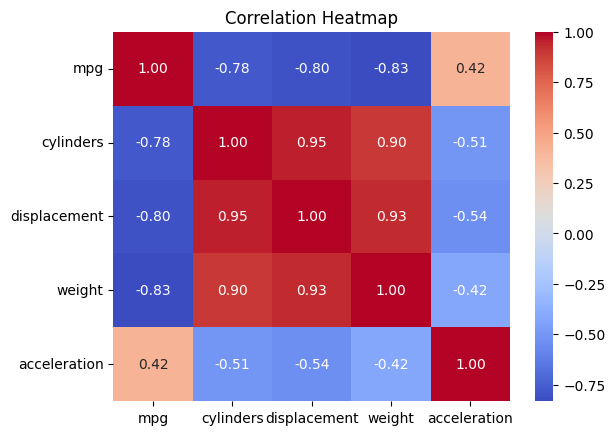

In [150]:
# Heatmap
corr = mpg[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

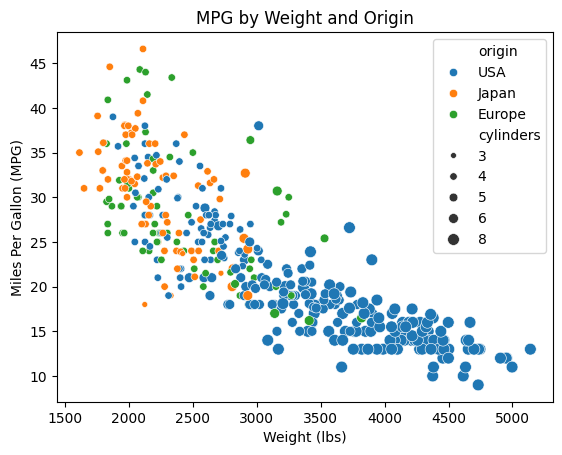

In [151]:
sns.scatterplot(data=mpg, x='weight', y='mpg', hue='origin', size='cylinders')
plt.title('MPG by Weight and Origin')
plt.xlabel('Weight (lbs)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

## Value of Interactive Visualizations

Static Visualizations are great for presenting results, but they can be limiting when it comes to exploring data. Interactive visualizations allow us to:
- **Zoom and Pan**: Focus on specific areas of the plot.
- **Hover for Details**: Get more information about specific data points.
- **Filter Data**: Select subsets of data to visualize.
- **Change Parameters**: Adjust parameters dynamically to see how they affect the visualization.
These features make it easier to understand complex datasets and identify patterns or anomalies.

### Three Modes for Plotly

There are three modes for using Plotly that we will explore in this course:

1. **Pandas Plotting**: A convenient interface for creating Plotly visualizations directly from Pandas DataFrames. It simplifies the process of generating plots from tabular data.
2. **Plotly Express**: A high-level interface for creating plots with minimal code. It is ideal for quick visualizations and exploratory data analysis.  This is similar to the Seaborn interface for Matplotlib, which is a higher-level interface to Matplotlib that makes it easier to create complex visualizations with less code. Like Pandas Plotting, it is designed to work seamlessly with Pandas DataFrames and provides a simple API for creating a wide range of visualizations.
3. **Graph Objects**: A more flexible and powerful interface that allows for fine-grained control over the appearance and behavior of plots. It is suitable for creating complex visualizations and custom layouts.


#### Using `pandas` Plotting

To use Plotly in `pandas`, you need to set the plotting backend to Plotly. This allows you to use the `plot` method on `pandas` `DataFrames` to create interactive plots.

In [152]:
pd.set_option('plotting.backend', 'plotly')

Now we can use the `plot` method on our `DataFrame` to create interactive plots.

In [153]:
mpg.plot(
    kind='scatter',
    x='weight', y='mpg', color='origin', size='cylinders',
    title='MPG vs. Weight by Origin',
    width=800, height=600)

Notice how we specify the `kind` of plot as well as how the data should be mapped to the axes, color, and size.  This is an interactive plot so you can mouse over the points to see more information. You can double and tripple click on the legend to hide and show different series. You can also zoom in and out of the plot by clicking and dragging on the plot area. Here we also set the width and height of the plot to make it larger and more readable.


#### Creating an Interactive Scatter Plot with Plotly Express

Plotly express is closely related to Pandas Plotting, but it is a separate library that provides a high-level interface for creating plots. It is designed to work seamlessly with `pandas` `DataFrames` and provides a simple API for creating a wide range of visualizations. Plotly express offers more flexibility and customization options than `pandas` plotting, making it a powerful tool for creating complex visualizations.

**Key components:**

1. **`px.scatter`**: Generates a scatter plot to visualize relationships between two numerical variables.
2. **Parameters**:
    - **`mpg`**: Dataset containing car information.
    - **`x='weight'`**: X-axis represents car weight.
    - **`y='mpg'`**: Y-axis represents miles per gallon.
    - **`color='origin'`**: Groups points by car origin.
    - **`size='cylinders'`**: Marker size reflects the number of cylinders.
    - **`size_max=12`**: Limits marker size.
    - **`hover_data=mpg.columns`**: Displays all dataset columns on hover.
    - **`title='MPG vs. Weight by Origin'`**: Adds a plot title.
    - **`labels={'weight': 'Weight (lbs)', 'mpg': 'Miles Per Gallon (MPG)'}`**: Customizes axis labels.
    - **`width=800, height=600`**: Sets plot dimensions.

In [154]:
import plotly.express as px

px.scatter(mpg, x='weight', y='mpg', color='origin',
           size='cylinders', size_max=12,
           hover_data=mpg.columns,
           title='MPG vs. Weight by Origin',
           labels={'weight': 'Weight (lbs)', 'mpg': 'Miles Per Gallon (MPG)'},
           width=800, height=600)

All the basic plotting functions in `pandas` and `plotly express` return `Figure` objects, which can be further customized using the methods available in the `plotly.graph_objects` module. We can use `update_layout` to update some parameters in the figure.

**Key Components:**

1. **Parameters**:
    - **`animation_frame='model year'`**: Animates the plot over the `model year` column, showing changes over time.

2. **`fig.update_layout`**:
    - **`xaxis_title` and `yaxis_title`**: Sets the axis titles.
    - **`xaxis_range` and `yaxis_range`**: Defines the range of the x and y axes.
    - **`legend_title_text`**: Sets the title for the legend.

In [155]:
fig = px.scatter(mpg, x='weight', y='mpg', color='origin',
                 hover_data=mpg.columns,
                 animation_frame='model year',
                 title='MPG vs. Weight by Origin',
                 labels={'weight': 'Weight (lbs)', 'mpg': 'Miles Per Gallon (MPG)'},
                 width=800, height=600)
fig.update_layout(
    xaxis_title='Weight (lbs)',
    yaxis_title='Miles Per Gallon (MPG)',
    xaxis_range=[1500, 5000],
    yaxis_range=[10, 50],
    legend_title_text='Origin',
)
fig.show()

In [156]:
fig = mpg.plot(
    kind='scatter',
    x='weight', y='mpg', color='origin', size='cylinders',
    title='MPG vs. Weight by Origin',
    width=800, height=600)

# change to the style
fig.update_layout(template='plotly_dark')
# fig.update_layout(template='plotly_white')
# fig.update_layout(template='ggplot2')
# fig.update_layout(template='seaborn')
fig.update_layout(xaxis_title='Weight (lbs)',
                  yaxis_title='Miles per Gallon (MPG)',
                  legend_title='Origin')
fig.show()

We can also save plots to HTML files, which can be shared and embedded in web applications. This is useful for creating interactive reports and dashboards.



In [157]:
fig.write_html('mpg_scatter.html', include_plotlyjs='cdn')
fig.write_image('mpg_scatter.png', scale=2, width=800, height=600)
fig.write_image('mpg_scatter.pdf', scale=2, width=800, height=600)

/tmp/ipykernel_12721/2509829786.py:2: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).


/tmp/ipykernel_12721/2509829786.py:3: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




The figure object is made of two key components:
- the **data** and
- the **layout**.

The data is a list of traces, which are the individual plots that make up the figure. The layout is a dictionary that contains information about the appearance of the plot, such as the title, axis labels, and legend.

In [158]:
display(fig.data)
display(fig.layout)

(Scatter({
     'hovertemplate': 'origin=USA<br>weight=%{x}<br>mpg=%{y}<br>cylinders=%{marker.size}<extra></extra>',
     'legendgroup': 'USA',
     'marker': {'color': '#636efa',
                'size': array([8, 8, 8, ..., 4, 4, 4], shape=(249,)),
                'sizemode': 'area',
                'sizeref': 0.02,
                'symbol': 'circle'},
     'mode': 'markers',
     'name': 'USA',
     'orientation': 'v',
     'showlegend': True,
     'x': array([3504, 3693, 3436, ..., 2295, 2625, 2720], shape=(249,)),
     'xaxis': 'x',
     'y': array([18., 15., 18., ..., 32., 28., 31.], shape=(249,)),
     'yaxis': 'y'
 }),
 Scatter({
     'hovertemplate': ('origin=Japan<br>weight=%{x}<br' ... '=%{marker.size}<extra></extra>'),
     'legendgroup': 'Japan',
     'marker': {'color': '#EF553B',
                'size': array([4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                               4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

Layout({
    'height': 600,
    'legend': {'itemsizing': 'constant', 'title': {'text': 'Origin'}, 'tracegroupgap': 0},
    'template': '...',
    'title': {'text': 'MPG vs. Weight by Origin'},
    'width': 800,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Weight (lbs)'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Miles per Gallon (MPG)'}}
})

Just as before we get back a `Figure` object that we can further customize.

In [159]:
fig = px.scatter(mpg, x='weight', y='mpg', color='origin', size='cylinders',
                 title='MPG vs. Weight by Origin',
                 width=800, height=600,
                 template='plotly_dark')
# change the marker symbol for the USA trace
fig.update_traces(marker=dict(symbol="square"), selector=dict(name="USA"))
# you can also just modify the data dictionary directly
#fig.data[0]['marker']['symbol'] = "square"

# change formatting (layout) of the figure
fig.update_layout(font=dict(family="Courier New, monospace", size=16))
# You can also refer to the font family and size directly
fig.update_layout(font_family="Courier New, monospace", font_size=16)
fig

### Using Plotly Graphics Objects

The Graphics objects are a more flexible and powerful interface that allows for fine-grained control over the appearance and behavior of plots. It is suitable for creating complex visualizations and custom layouts.

A Figure Graphic Object is composed of:
- **Data:** A list of traces (e.g., Scatter, Lines, Annotations)
- **Layout:** A dictionary describing the overall layout (e.g., title, axis properties, …)


In [160]:
from plotly import graph_objects as go

In [161]:
fig = go.Figure()
max_size = 20

# Iterate over unique origins and create a scatter trace for each
for i, origin in enumerate(mpg['origin'].unique()):
    # Filter the DataFrame for the current origin
    subset = mpg[mpg['origin'] == origin]
    marker_sizes = max_size*subset['cylinders']/subset['cylinders'].max()
    # Create a hover text for each point
    hover_text = (
            subset['origin'] + "<br>"
                  "Weight: " + subset['weight'].astype(str) + "<br>"
                  "MPG: " + subset['mpg'].astype(str) + "<br>"
                  "Cylinders: " + subset['cylinders'].astype(str))
    # add a trace to the figure
    fig.add_trace(
        go.Scatter(
            x=subset['weight'], y=subset['mpg'],
            mode='markers',
            name=origin,
            marker=dict(size=marker_sizes, color=i),
            text=hover_text,
        )
    )
fig.add_annotation(
    text="Data source: Auto MPG dataset",
    xref="paper", yref="paper",
    x=0, y=-0.1,
    showarrow=False,
    font=dict(size=12, color="gray")
)
fig.update_layout(
    title='MPG vs. Weight by Origin',
    xaxis_title='Weight (lbs)',
    yaxis_title='Miles per Gallon (MPG)',
    width=800, height=600,
    template='plotly_white',
    font_family="Times", font_size=16,
)
fig.show()

### Visualizing Different Kinds of Data

Now that we have seen the basics of using Plotly, let's explore how to visualize different kinds of data.


#### Histograms

In [162]:
px.histogram(mpg, x='mpg', facet_row='origin')

In [163]:
mpg.hist(x='mpg', color='origin', bins=10, barmode='overlay')

In [164]:
fig = mpg.hist(x='mpg', color='origin', bins=10, facet_row='origin',
         title='MPG Distribution by Origin',
         width=800, height=600)
fig

In [165]:
mpg['make'] =mpg['car name'].str.split(' ').str[0]
mpg.plot(kind='bar',
         x='make', color='origin',
         hover_data=['mpg', 'cylinders', 'car name'],
         title='Average MPG by Make and Origin',
         width=800, height=600)

#### Scatter and Line Plots

In [166]:
yearly_mpg = (
    mpg
    .groupby(['origin', 'model year'])
    [['mpg', 'displacement', 'weight']]
    .mean().reset_index()
)
yearly_mpg.head()

,origin,model year,mpg,displacement,weight
0,Europe,70,25.20,107.800000,2309.200000
1,Europe,71,28.75,95.000000,2024.000000
2,Europe,72,22.00,111.000000,2573.200000
3,Europe,73,24.00,105.000000,2335.714286
4,Europe,74,27.00,93.166667,2139.333333


In [167]:
px.scatter(yearly_mpg, x='model year', y='mpg', color='origin',
        title='Average MPG by Model Year and Origin',
        width=800, height=600)

In [168]:
px.line(yearly_mpg, x='model year', y='mpg', color='origin',
        markers=True,
        title='Average MPG by Model Year and Origin',
        width=800, height=600)
